In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from logRegFuncs import *

In [3]:
"""Reading & Sorting Data"""
data = pd.read_csv("../data/train.csv")

y = data.Survived.to_numpy()
data = data.drop("Survived", axis=1)
data = data.drop("PassengerId", axis = 1)

X = data.to_numpy()
m,n = np.shape(X)
X = np.c_[np.ones(m), X]

In [4]:
"""Initialising Parameter Search"""
theta = trainModel(X, y)

In [6]:
"""Reading & Sorting CV Data"""
data = pd.read_csv("../data/CV.csv")

y_CV = data.Survived.to_numpy()
data = data.drop("Survived", axis=1)
data = data.drop("PassengerId", axis = 1)

X_CV = data.to_numpy()
m,n = np.shape(X_CV)
X_CV = np.c_[np.ones(m), X_CV]

p = predict(theta, X_CV)
print("Basic model accuracy = ", np.mean(p == y_CV))

Basic model accuracy =  0.8026905829596412


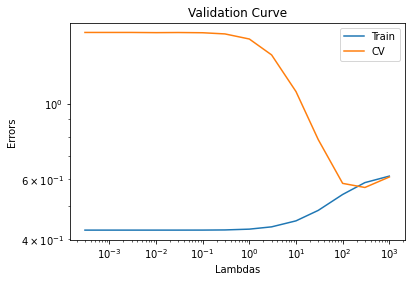

       Lambda  Train Error  CV Error
0      0.0003     0.424820  1.617632
1      0.0010     0.424820  1.617643
2      0.0030     0.424820  1.617596
3      0.0100     0.424821  1.615493
4      0.0300     0.424828  1.616873
5      0.1000     0.424896  1.614342
6      0.3000     0.425319  1.601554
7      1.0000     0.427622  1.547358
8      3.0000     0.434297  1.389692
9     10.0000     0.452274  1.084417
10    30.0000     0.485491  0.783567
11   100.0000     0.540637  0.582791
12   300.0000     0.585840  0.566822
13  1000.0000     0.612111  0.608488


In [7]:
"""Plotting CV Error Against Range of Lambdas to Optimise"""
lambdas = np.array([0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000])

error_train, error_CV = validationCurve(X, y, X_CV, y_CV, lambdas)

lambda_errors = pd.DataFrame()
lambda_errors["Lambda"] = lambdas
lambda_errors["Train Error"] = error_train
lambda_errors["CV Error"] = error_CV

plt.loglog(lambdas, error_train, label = "Train"); plt.loglog(lambdas, error_CV, label = "CV"); plt.legend(); plt.xlabel("Lambdas"); plt.ylabel("Errors"); plt.title("Validation Curve"); plt.show()
print(lambda_errors)

In [15]:
"""Using Optimal Lambda To Output Thetas"""
np.random.seed()

lambda_optimal = 10
theta = trainModel(X, y, lambda_ = lambda_optimal)

p = predict(theta, X_CV)
print("Optimised model on CV accuracy = ",np.mean(p == y_CV))
print("Optimised theta values = ", theta)


Optimised model on CV accuracy =  0.8071748878923767
Optimised theta values =  [ 3.05150421 -0.77414611 -1.88318387 -0.02421089 -0.18031988 -0.0525808
  0.00383059  0.11417262  0.1657316  -0.10161977  0.17005717  0.26071281
  0.24957623  0.14301264  0.          0.0292908   0.        ]


C:\Users\cdiver\Documents\GitHub\kaggle-titanic\logisticRegression\logRegFuncs.py:18: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y @ np.log(h) - (1 - y) @ np.log(1 - h))
C:\Users\cdiver\Documents\GitHub\kaggle-titanic\logisticRegression\logRegFuncs.py:18: RuntimeWarning: invalid value encountered in matmul
  J = (1 / m) * np.sum(-y @ np.log(h) - (1 - y) @ np.log(1 - h))


     Data Quantity  Train Error   CV Error
0                1     3.941097  13.093720
1                2     6.090813        NaN
2                3   474.837530        NaN
3                4   380.302835        NaN
4                5   575.269539        NaN
..             ...          ...        ...
663            664     0.603093   2.118272
664            665     0.603724   2.129752
665            666     0.602980   2.132316
666            667     0.604205   2.150562
667            668     0.603613   2.153244

[668 rows x 3 columns]


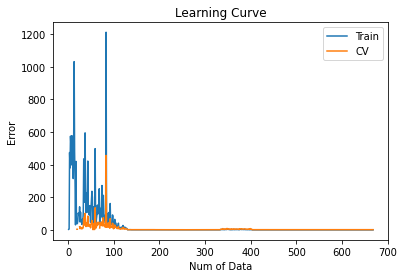

In [17]:
"""Generating CV & Train Learning Curves"""
error_train, error_CV = learningCurve(X, y, X_CV, y_CV, lambda_ = lambda_optimal)
num_data = np.arange(1, y.size+1)

learning_curve = pd.DataFrame()
learning_curve["Data Quantity"] = num_data
learning_curve["Train Error"] = error_train
learning_curve["CV Error"] = error_CV

print(learning_curve)
plt.plot(num_data, error_train, label="Train"); plt.plot(num_data, error_CV, label = "CV"); plt.legend(); plt.xlabel("Num of Data"); plt.ylabel("Error"); plt.title("Learning Curve"); plt.show()

In [20]:
"""Generating Test Results"""
test = pd.read_csv('../data/test.csv')
passengerId = test.PassengerId
test = test.drop("PassengerId", axis=1)

X_test = test.to_numpy()
m,n = np.shape(X_test)
X_test = np.c_[np.ones(m), X_test]

y_predicted = predict(theta, X_test)

solution = pd.DataFrame()
solution["PassengerId"] = passengerId
solution["Survived"] = y_predicted
solution.Survived = solution.Survived.astype(int)
solution.to_csv("../logisticRegression/solution.csv", sep=",", index=False)
